# Hybrid Model

In [3]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We do not specify the AR and MA orders in `auto_arima` library in the sense that `start_p`, `start_q` and other parameters require initial order. Using this initial order, library find the optimum one.

In [4]:
# This code imports the data you generated before for replicating.
stock_prices = pd.read_csv('stock_prices.csv')
split = int(len(stock_prices['VZ'])*0.95)
train_T = stock_prices['T'].iloc[:split]
test_T = stock_prices['T'].iloc[split:]
train_VZ = stock_prices['VZ'].iloc[:split]
test_VZ = stock_prices['VZ'].iloc[split:]

## AT&T

In [5]:
auto_arima_T = auto_arima(train_T, start_p=1, start_q=1, d=1, \
               max_p=15, max_q=15, information_criterion="bic")
prediction_arima_T = list(auto_arima_T.predict_in_sample())
residual_T = pd.Series(np.array(train_T) - np.array(prediction_arima_T))

In [6]:
import matplotlib.dates as mdates
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b/%Y')


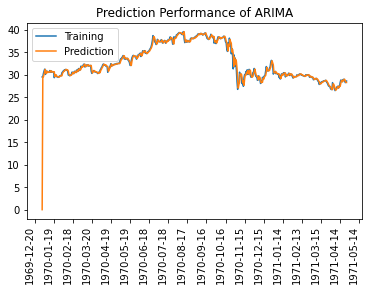

In [7]:
plt.plot(train_T.index, train_T, label='Training')
plt.plot(train_T.index, prediction_arima_T, label='Prediction')
plt.title('Prediction Performance of ARIMA')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.show()

## Verizon

In [8]:
auto_arima_VZ = auto_arima(train_VZ, start_p=1, start_q=1, d=1, \
               max_p=15, max_q=15, information_criterion="bic")
prediction_arima_VZ = list(auto_arima_VZ.predict_in_sample())
residual_VZ = pd.Series(np.array(train_VZ)- np.array(prediction_arima_VZ))



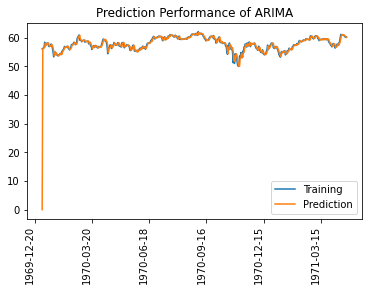

In [9]:
plt.plot(train_VZ.index, train_VZ, label='Training')
plt.plot(train_VZ.index, prediction_arima_VZ, label='Prediction')
plt.title('Prediction Performance of ARIMA')
plt.legend(loc='best')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=90)
plt.show()